## Part I

### (1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("digits_train.csv")
test = pd.read_csv("digits_test.csv")

row:0| digit:1
row:151| digit:7
row:21| digit:5
row:15| digit:6


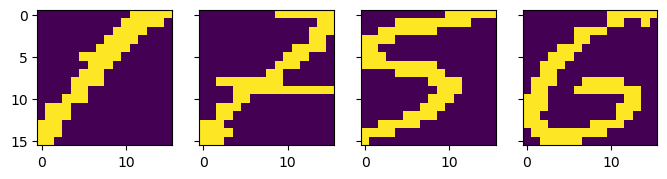

In [3]:
def plotDigit(k, dat):
    f = np.reshape(np.array(dat.loc[k][0:256]), [-1, 16])
    print("row:" + str(k) + "| digit:" + str(dat.loc[k][256]))
    return f

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(8, 2))

ax1.imshow(plotDigit(0, train)) # 1
ax2.imshow(plotDigit(151, train)) # 7

ax3.imshow(plotDigit(21, train)) # 5
ax4.imshow(plotDigit(15, train)) # 6

fig.show()



上述图片显示数字分别为1、7、5、6  
认为1和7难以区分，5和6难以区分

### (2)

In [4]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix

In [5]:
# 选择1和7，获取训练集和测试集
train_1or7 = train[(train["digit"] == 1) | (train["digit"] == 7)]
test_1or7 = test[(test["digit"] == 1) | (test["digit"] == 7)]

# print(train_1or7)
# print(test_1or7)

# 获取自变量和响应变量
# .iloc 基于整数位置进行索引，不用关心列名
train_1or7_X = train_1or7.iloc[:, :-1]
train_1or7_y = train_1or7.iloc[:, -1]

# print(train_1or7_X)
# print(train_1or7_y)

test_1or7_X = test_1or7.iloc[:, :-1]
test_1or7_y = test_1or7.iloc[:, -1]

# 初始化逻辑回归模型
model_1or7 = LR()

# 训练
model_1or7.fit(train_1or7_X, train_1or7_y)

# 在训练集上进行预测并获取混淆矩阵
y_pred_train_1or7 = model_1or7.predict(train_1or7_X)
cm_train_1or7 = confusion_matrix(train_1or7_y, y_pred_train_1or7)

# 在测试集上进行预测并获取混淆矩阵
y_pred_test_1or7 = model_1or7.predict(test_1or7_X)
cm_test_1or7 = confusion_matrix(test_1or7_y, y_pred_test_1or7)

# print(len(y_pred_test_1or7))
# print(len(test_1or7_y))

# 打印混淆矩阵
print("训练集上作混淆矩阵为：\n" + str(cm_train_1or7))
print("测试集上作混淆矩阵为：\n" + str(cm_test_1or7))

训练集上作混淆矩阵为：
[[76  0]
 [ 0 63]]
测试集上作混淆矩阵为：
[[25  1]
 [ 1 29]]


### (3)

In [6]:
# 选择0和1，获取训练集和测试集
train_0or1 = train[(train["digit"] == 0) | (train["digit"] == 1)]
test_0or1 = test[(test["digit"] == 0) | (test["digit"] == 1)]

# 获取自变量和响应变量
# .iloc 基于整数位置进行索引，不用关心列名
train_0or1_X = train_0or1.iloc[:, :-1]
train_0or1_y = train_0or1.iloc[:, -1]

test_0or1_X = test_0or1.iloc[:, :-1]
test_0or1_y = test_0or1.iloc[:, -1]

# 初始化逻辑回归模型
model_0or1 = LR()

# 训练
model_0or1.fit(train_0or1_X, train_0or1_y)

# 在训练集上进行预测并获取混淆矩阵
y_pred_train_0or1 = model_0or1.predict(train_0or1_X)
cm_train_0or1 = confusion_matrix(train_0or1_y, y_pred_train_0or1)

# 在测试集上进行预测并获取混淆矩阵
y_pred_test_0or1 = model_0or1.predict(test_0or1_X)
cm_test_0or1 = confusion_matrix(test_0or1_y, y_pred_test_0or1)

# 打印混淆矩阵
print("训练集上作混淆矩阵为：\n" + str(cm_train_0or1))
print("测试集上作混淆矩阵为：\n" + str(cm_test_0or1))

训练集上作混淆矩阵为：
[[53  0]
 [ 0 76]]
测试集上作混淆矩阵为：
[[40  0]
 [ 0 26]]


### (4)

(2)中选取1和7对应数据进行逻辑回归，由于数据中特征很多，而没有太多训练数据，使用一部分特征就能完美区分两个类，所以训练集上特征矩阵中假阳例数和假阴例数都为零，测试集上假阳例数和假阴例数都为一。此时两测试集上真阳率和真阴率不为100%主要是因为1和7相对难以区分，即使特征很多也会出现分类错误

(3)中选取0和1对应数据进行逻辑回归，由于数据中特征很多，而没有太多训练数据，使用一部分特征就能完美区分两个类，同时0和1相对易于区分，在训练集和测试集上混淆矩阵的真阳率和真阴率都为100%

### (5)

In [7]:
def draw_fig(test_1or7: pd.DataFrame, test_1or7_y: pd.DataFrame, y_pred_test_1or7: np.ndarray, targetNum: int):
    # 初始化生成图数量
    figNum = 0

    # 这里 test_1or7_y 的索引不是连续的
    index = test_1or7_y.index

    # 比较预测值和真实值
    for i in index: 
        # print(i)
        if figNum >= targetNum:
            break
        # 这里test_1or7_y为dataframe, y_pred_test_1or7为nparray，nparray中不包含索引信息，但数据排列顺序与test_1or7_y中对应，所以这种写法成立
        if test_1or7_y[i] != y_pred_test_1or7[i]: 
            fig, ax = plt.subplots(1, 1, sharey=True, figsize=(2, 2))
            ax.imshow(plotDigit(i, test_1or7))
            ax.set_title(f"True value:{test_1or7_y[i]} Predicted value{y_pred_test_1or7[i]}")
            fig.show()
            figNum += 1

row:6| digit:7
row:22| digit:1


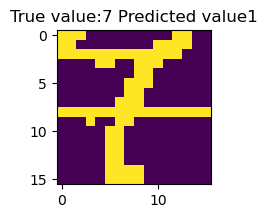

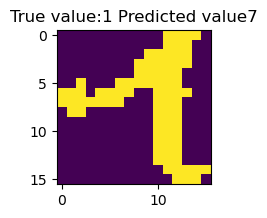

In [8]:
draw_fig(test_1or7, test_1or7_y, y_pred_test_1or7, 2)

上面两张图片分别展示了测试集中真实值为7，预测值为1和真实值为1，预测值为7的情景

## Part II

### (1)

In [9]:
# 分离自变量和响应变量
train_X = train.iloc[:, :-1]
train_y = train.iloc[:, -1]

test_X = test.iloc[:, :-1]
test_y = test.iloc[:, -1]

# 模型初始化和训练
model_P2 = LR()
model_P2.fit(train_X, train_y)

# 生成并打印训练集上混淆矩阵
y_pred_train = model_P2.predict(train_X)
cm_train = confusion_matrix(train_y, y_pred_train)
# 为方便观察加入数字标记
column_number = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
row_number = np.array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm_train = np.insert(cm_train, 0, column_number, axis=0)
cm_train = np.insert(cm_train, 0, row_number, axis=1)

print(f"训练集上混淆矩阵为:\n{cm_train}")

训练集上混淆矩阵为:
[[ 0  0  1  2  3  4  5  6  7  8  9]
 [ 0 53  0  0  0  0  0  0  0  0  0]
 [ 1  0 76  0  0  0  0  0  0  0  0]
 [ 2  0  0 72  0  0  0  0  0  0  0]
 [ 3  0  0  0 64  0  0  0  0  0  0]
 [ 4  0  0  0  0 67  0  0  0  0  0]
 [ 5  0  0  0  0  0 56  0  0  0  0]
 [ 6  0  0  0  0  0  0 63  0  0  0]
 [ 7  0  0  0  0  0  0  0 63  0  0]
 [ 8  0  0  0  0  0  0  0  0 55  0]
 [ 9  0  0  0  0  0  0  0  0  0 68]]


由训练集上混淆矩阵知多元逻辑回归模型完美地区分了所有类，每类数字的真阳率都为100%

### (2)

In [10]:
# 生成并打印测试集上混淆矩阵
y_pred_test = model_P2.predict(test_X)
cm_test = confusion_matrix(test_y, y_pred_test)
# 为方便观察加入数字标记
column_number = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
row_number = np.array([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm_test = np.insert(cm_test, 0, column_number, axis=0)
cm_test = np.insert(cm_test, 0, row_number, axis=1)

print(f"测试集上混淆矩阵为:\n{cm_test}")

测试集上混淆矩阵为:
[[ 0  0  1  2  3  4  5  6  7  8  9]
 [ 0 38  0  0  0  0  0  0  0  2  0]
 [ 1  0 25  0  0  0  1  0  0  0  0]
 [ 2  0  0 27  0  0  0  1  0  4  0]
 [ 3  0  0  0 26  0  0  0  1  0  0]
 [ 4  0  4  0  0 29  0  0  0  0  0]
 [ 5  0  0  0  1  0 35  0  2  0  0]
 [ 6  1  0  0  0  1  1 33  0  0  0]
 [ 7  0  1  0  0  0  0  0 28  0  1]
 [ 8  0  1  1  0  0  0  0  1 22  2]
 [ 9  1  1  0  2  0  0  0  0  0 25]]


由测试集上混淆矩阵知较难分类的数字为1和4，2和8  
第一部分中猜测1和7，5和6较难分类，虽然从混淆矩阵中得知有1个7被预测为1，1个6被预测为5，但相比于4个4被预测为1，4个2被预测为8而言，1和7，5和6并非最难分类的数字

### (3)

In [11]:
from sklearn.metrics import f1_score, roc_auc_score

In [12]:
accuracy_test = model_P2.score(test_X, test_y)
f1 = f1_score(test_y, y_pred_test, average='weighted')

y_pred_proba_test = model_P2.predict_proba(test_X)

# 'ovr'意为一对多
roc_auc_test = roc_auc_score(test_y, y_pred_proba_test, average='weighted', multi_class='ovr')

print(f"测试集的预测精度为{accuracy_test}")
print(f"F1分数为{f1}")
print(f"AUC为{roc_auc_test}")

测试集的预测精度为0.9056603773584906
F1分数为0.9063241149375141
AUC为0.9952538939979009


### (4)

row:19| digit:8
row:46| digit:2
row:47| digit:8
row:65| digit:9


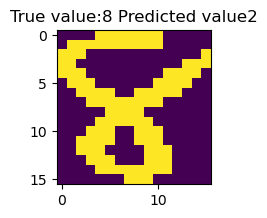

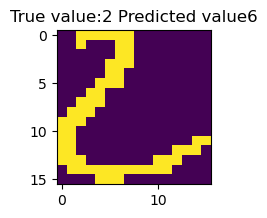

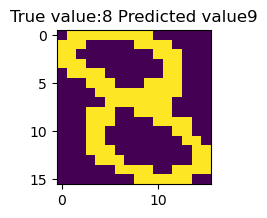

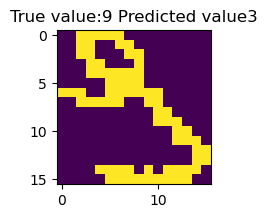

In [13]:
draw_fig(test, test_y, y_pred_test, 4)

## Part III

### (1)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [15]:
# 用岭回归拟合一个多元逻辑回归模型
model_P3 = LR(penalty='l2', solver='lbfgs', multi_class='multinomial')

# 生成一系列C值
values_C = np.logspace(-5, 5, 100)

tuned_parameters = [{'C': values_C}]
# 十折交叉验证
n_folds = 10

clf = GridSearchCV(model_P3, tuned_parameters, cv=n_folds, refit=False, scoring='accuracy')
clf.fit(train_X, train_y)

scores = clf.cv_results_['mean_test_score']

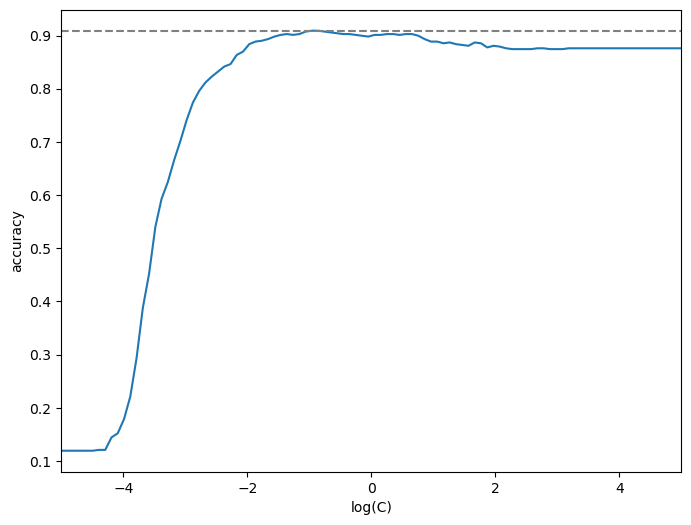

{'C': np.float64(0.10974987654930568)}


In [16]:
# 取对数
log_C = np.log10(values_C)

# 画图
plt.figure().set_size_inches(8, 6)
plt.plot(log_C, scores)
plt.ylabel('accuracy')
plt.xlabel('log(C)')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([log_C[0], log_C[-1]])
plt.show()

# 打印最佳参数
print(clf.best_params_)

### (2)

In [17]:
C_min = clf.best_params_['C']
print(f"C_min={C_min}")

model_P3 = LR(penalty='l2', solver='lbfgs', multi_class='multinomial', C=C_min)
model_P3.fit(train_X, train_y)

accuracy_train = model_P3.score(train_X, train_y)
accuracy_test = model_P3.score(test_X, test_y)

print(f"训练集上预测精度：{accuracy_train}")
print(f"测试集上预测精度：{accuracy_test}")


C_min=0.10974987654930568
训练集上预测精度：0.9921507064364207
测试集上预测精度：0.889937106918239


### (3)

In [18]:
# 对于多分类问题，逻辑回归模型为每个类别拟合一组系数和截距（除了基准类别）
all_coefs = model_P3.coef_
# print(all_coefs)

# print(len(all_coefs[0]))
# 取所有类别各系数绝对值均值，用以判断某一特征对应系数是否为零
mean_coefs = [0 for _ in range(len(all_coefs[0]))]
for coefs in all_coefs:
    for j in range(len(coefs)):
        mean_coefs[j] += abs(coefs[j]) # 这里要取绝对值，防止正负值抵消

# 取均值
for i in range(len(mean_coefs)):
    mean_coefs[i] = mean_coefs[i] / len(all_coefs)

mean_coefs = np.round(mean_coefs, 4)
print(f"所有类别各系数绝对值均值为：\n{mean_coefs}\n")
print(f"均值中最大值为：{np.max(mean_coefs)}")
print(f"均值中最小值为：{np.min(mean_coefs)}")

所有类别各系数绝对值均值为：
[0.081  0.0946 0.1072 0.0951 0.1008 0.1023 0.1066 0.1432 0.1359 0.1145
 0.1206 0.1427 0.1469 0.1021 0.0962 0.1364 0.069  0.0799 0.0766 0.0781
 0.0527 0.0645 0.0827 0.0875 0.069  0.0822 0.0521 0.0734 0.0504 0.0569
 0.0609 0.0731 0.0677 0.1159 0.1019 0.0821 0.0629 0.0536 0.0764 0.0406
 0.0525 0.0717 0.0807 0.0623 0.0655 0.0957 0.1162 0.1159 0.0745 0.1056
 0.0843 0.0802 0.0593 0.0583 0.0479 0.0516 0.0637 0.0713 0.0732 0.0868
 0.0902 0.0992 0.1162 0.1107 0.0959 0.1312 0.0827 0.0771 0.0799 0.0663
 0.0637 0.0696 0.0743 0.0724 0.0689 0.0695 0.0908 0.0997 0.1282 0.0964
 0.119  0.1176 0.0827 0.0985 0.0905 0.0805 0.0768 0.0783 0.0813 0.075
 0.0774 0.0894 0.1128 0.1013 0.1148 0.0722 0.1106 0.1299 0.0966 0.0701
 0.0875 0.0883 0.1013 0.0929 0.0919 0.0725 0.0661 0.0952 0.0654 0.076
 0.1121 0.0945 0.1144 0.1089 0.0584 0.0612 0.0732 0.0891 0.1025 0.0678
 0.0812 0.0694 0.0636 0.0803 0.051  0.0492 0.0913 0.0854 0.1023 0.1304
 0.0717 0.059  0.0634 0.0635 0.0792 0.0819 0.0753 0.0894 0.0513 

上述操作将所有类别的回归系数取绝对值并取均值，所得均值最大值与最小值并无明显数量级差异，认为没有系数被估计为零，这符合岭回归特性，与期望一致

### (4)

- lasso 回归结果应该不如 ridge 回归
    - lasso 回归与 ridge 回归不同，其更可能将部分在分类中起作用较小的特征对应回归系数取值为零，此时在预测中起作用的特征数量减少，预测效果会不如 ridge 回归
    - 但 lasso 回归的泛化效果会强于 ridge 回归，其将模型拉离最优状态的幅度更大，在惩罚系数相同时相比 ridge 回归有更大惩罚力度，过拟合可能性降低

## Part IV

### (1)

In [19]:
from sklearn.decomposition import PCA

In [20]:
def pca_and_logistic_regression_l2(num_pc, train_X, train_y, test_X, test_y):
    pca = PCA(n_components=256)
    pca.fit(train_X)

    pca_train_X = pca.transform(train_X)
    pca_test_X = pca.transform(test_X)

    # 使用前 num_pc 个主成分
    pca_train_X = pca_train_X[:, :num_pc]
    pca_test_X = pca_test_X[:, :num_pc]

    # 用岭回归拟合一个多元逻辑回归模型
    model_P4 = LR(penalty='l2', solver='lbfgs', multi_class='multinomial')

    # 生成一系列C值
    values_C = np.logspace(-5, 5, 100)

    tuned_parameters = [{'C': values_C}]
    # 十折交叉验证
    n_folds = 10

    clf = GridSearchCV(model_P4, tuned_parameters, cv=n_folds, refit=False, scoring='accuracy')
    clf.fit(pca_train_X, train_y)

    scores = clf.cv_results_['mean_test_score']


    # 取对数
    log_C = np.log10(values_C)

    # 画图
    plt.figure().set_size_inches(8, 6)
    plt.plot(log_C, scores)
    plt.ylabel('accuracy')
    plt.xlabel('log(C)')
    plt.axhline(np.max(scores), linestyle='--', color='.5')
    plt.xlim([log_C[0], log_C[-1]])
    plt.show()

    # # 打印最佳参数
    # print(clf.best_params_)

    C_min = clf.best_params_['C']
    print(f"C_min={C_min}")

    model_P4 = LR(penalty='l2', solver='lbfgs', multi_class='multinomial', C=C_min)
    model_P4.fit(pca_train_X, train_y)

    accuracy_train = model_P4.score(pca_train_X, train_y)
    accuracy_test = model_P4.score(pca_test_X, test_y)

    print(f"训练集上预测精度：{accuracy_train}")
    print(f"测试集上预测精度：{accuracy_test}")
    

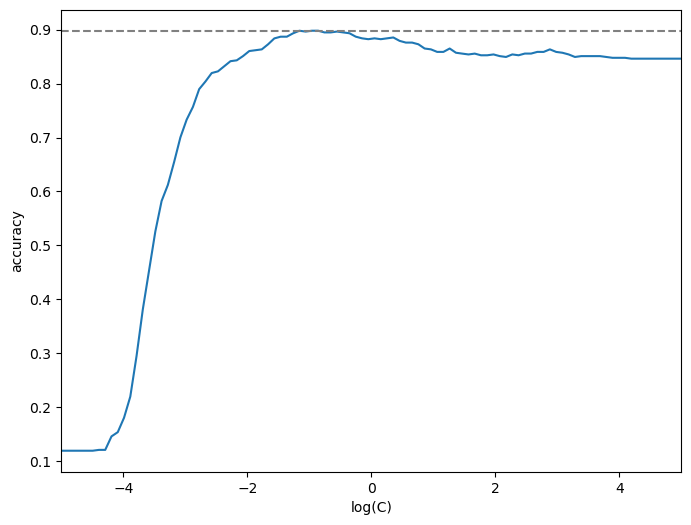

C_min=0.10974987654930568
训练集上预测精度：0.945054945054945
测试集上预测精度：0.8647798742138365


In [21]:
# 使用前30个主成分
pca_and_logistic_regression_l2(30, train_X, train_y, test_X, test_y)

- 使用前30个主成分，获得的C_min数值与第三部分中相同
- 训练集上和测试集上预测精度均小于第三部分中训练结果
    - 这是因为只使用了前30个主成分，自变量中包含的部分信息未参与模型训练及预测过程

### (3)

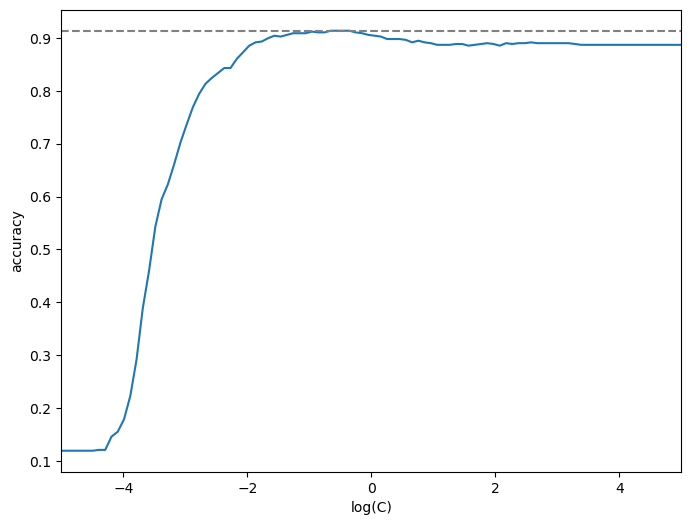

C_min=0.22051307399030456
训练集上预测精度：0.9858712715855573
测试集上预测精度：0.9025157232704403


In [22]:
# 使用前50个主成分
pca_and_logistic_regression_l2(50, train_X, train_y, test_X, test_y)

- 使用前50个主成分时，获得的C_min数值增大
- 相比于使用前30个主成分，在训练集上预测精度增大，但小于第三部分中模型的训练集上预测精度
    - 相比于使用前30个主成分，其中包含的自变量信息更多，所以在训练集上预测精度更大
    - 相比于第三部分中模型，其中包含自变量信息更少，所以在训练集上预测精度更小
- 相比于使用前30个主成分的模型和第三部分中的模型，在测试集上预测精度增大
    - 相比于第三部分中模型，此模型在测试集上预测精度更大，可能是因为此模型使用的自变量经过了主成分分析增强了泛化能力，且能更好地捕捉数据分布

## 进一步探究
由于好奇C_min数值变化规律，下面对C_min随主成分个数变化作图并分析

In [ ]:
def pca_and_lr_without_fig(num_pc, train_X, train_y, test_X, test_y):
    pca = PCA(n_components=256)
    pca.fit(train_X)

    pca_train_X = pca.transform(train_X)
    pca_test_X = pca.transform(test_X)

    # 使用前 num_pc 个主成分
    pca_train_X = pca_train_X[:, :num_pc]
    pca_test_X = pca_test_X[:, :num_pc]

    # 用岭回归拟合一个多元逻辑回归模型
    model_P4 = LR(penalty='l2', solver='lbfgs', multi_class='multinomial')

    # 生成一系列C值
    values_C = np.logspace(-5, 5, 100)

    tuned_parameters = [{'C': values_C}]
    # 十折交叉验证
    n_folds = 10

    clf = GridSearchCV(model_P4, tuned_parameters, cv=n_folds, refit=False, scoring='accuracy')
    clf.fit(pca_train_X, train_y)

    C_min = clf.best_params_['C']
    print(f"num_pc={num_pc}, C_min={C_min}")

    return C_min

num_pc=1, C_min=0.03430469286314919
num_pc=2, C_min=0.7054802310718645
num_pc=3, C_min=7.220809018385457
num_pc=4, C_min=11.497569953977356
num_pc=5, C_min=0.10974987654930568
num_pc=6, C_min=0.22051307399030456
num_pc=7, C_min=1.4174741629268048
num_pc=8, C_min=0.7054802310718645
num_pc=9, C_min=1.1233240329780265
num_pc=10, C_min=9.111627561154886
num_pc=11, C_min=0.3511191734215127
num_pc=12, C_min=0.1747528400007683
num_pc=13, C_min=0.13848863713938717
num_pc=14, C_min=0.22051307399030456
num_pc=15, C_min=0.13848863713938717
num_pc=16, C_min=0.06892612104349695
num_pc=17, C_min=0.08697490026177834
num_pc=18, C_min=0.04328761281083057
num_pc=19, C_min=0.05462277217684343
num_pc=20, C_min=0.10974987654930568
num_pc=21, C_min=0.13848863713938717
num_pc=22, C_min=0.13848863713938717
num_pc=23, C_min=0.13848863713938717
num_pc=24, C_min=0.10974987654930568
num_pc=25, C_min=0.08697490026177834
num_pc=26, C_min=0.13848863713938717
num_pc=27, C_min=0.13848863713938717
num_pc=28, C_min=0.10

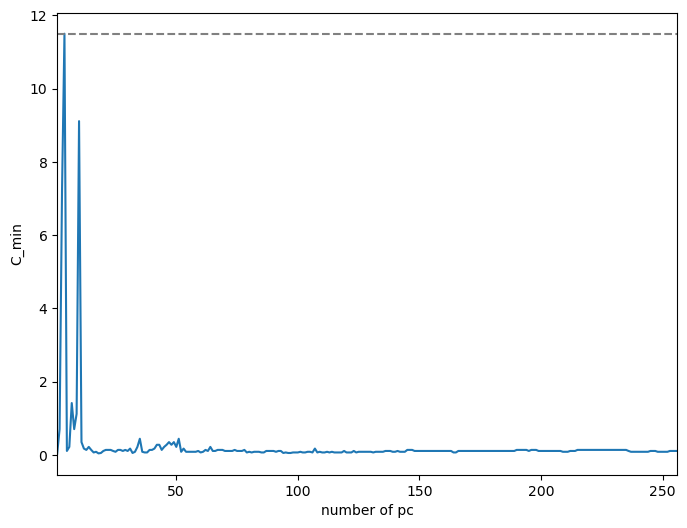

In [24]:
num_pc = [i for i in range(1, 257)]
values_C_min = []
for i in num_pc:
    values_C_min.append(pca_and_lr_without_fig(i, train_X, train_y, test_X, test_y))

# 作图
plt.figure().set_size_inches(8, 6)
plt.plot(num_pc, values_C_min)
plt.ylabel('C_min')
plt.xlabel('number of pc')
plt.axhline(np.max(values_C_min), linestyle='--', color='.5')
plt.xlim([num_pc[0], num_pc[-1]])
plt.show()

- 当主成分个数较少时C较大，主成分个数较多时C较小
    - 主成分个数较少时过拟合风险相对较小，取较大的C以控制较小的正则化力度，个数较多时与此相反
- 在Part IV 中，选取30个主成分时C_min数值比选取50个主成分时更小，意味着此时正则化力度更大，有点和分析相矛盾
    - 可能是主成分个数从30增加到50左右时，后面的主成分包含一些细节信息，模型需要这些信息以取得更好表现，所以降低了惩罚幅度
    - 可能随着主成分个数从30增加到50左右，数据的分布和特征发生变化，选取的C值随之改变